In [1]:
import matplotlib
import networkx as nx

In [2]:
import pickle
with open('data/graph.pkl','rb') as f:
    G=pickle.load(f)    

In [3]:
iiitd_profs=[i for i in list(G.nodes) if G.nodes[i]['authorCategory']=='iiitd']
G_=G.subgraph(iiitd_profs)

# Group Metrics

In [4]:
print("Number of Nodes in the Heterogeneous Graph",G.number_of_nodes())
print("Number of Edges in the Heterogeneous Graph",G.number_of_edges())
print("Number of Nodes in the Homogeneous Graph",G_.number_of_nodes())
print("Number of Edges in the Homogeneous Graph",G_.number_of_edges())


Number of Nodes in the Heterogeneous Graph 4973
Number of Edges in the Heterogeneous Graph 8536
Number of Nodes in the Homogeneous Graph 143
Number of Edges in the Homogeneous Graph 571


### Density

In [5]:
print("Density of Homogenous Graph",nx.density(G_))
print("Fraction of Hetergeneous Graph",nx.density(G))

Density of Homogenous Graph 0.05623953511277455
Fraction of Hetergeneous Graph 0.0006904541159429058


# Single Node Metrics

### Degree Centrality

Homogeneous

In [6]:
deg_hom=list(G_.degree)
deg_hom.sort(key=lambda x: x[1],reverse=True)
deg_hom[:10]

[('anubha gupta', 48),
 ('shivam sharma', 37),
 ('amarjeet singh', 31),
 ('anuradha sharma', 29),
 ('vibhor kumar', 28),
 ('gaurav gupta', 27),
 ('angshul majumdar', 27),
 ('rajiv ratn shah', 26),
 ('tanmoy chakraborty', 26),
 ('shikha singh', 24)]

Heterogeneous

In [7]:
deg_het=list(G.degree)
deg_het=[i for i in deg_het if G.nodes[i[0]]['authorCategory']=='iiitd']
deg_het.sort(key=lambda x: x[1],reverse=True)
deg_het[:10]

[('gaurav gupta', 456),
 ('ponnurangam kumaraguru', 342),
 ('anubha gupta', 334),
 ('kuldeep yadav', 320),
 ('mukesh mohania', 295),
 ('rajiv ratn shah', 287),
 ('tanmoy chakraborty', 264),
 ('amarjeet singh', 244),
 ('vibhor kumar', 225),
 ('gajendra ps raghava', 207)]

Helper Function

In [8]:
def process_dic(dic,reverse=True):
    l=list(dic.items())
    l=[i for i in l if G.nodes[i[0]]['authorCategory']=='iiitd']
    l.sort(key=lambda x:x[1],reverse=reverse)
    return l[:10]
    

### Closeness Centrality

Homogenous

In [9]:
process_dic(nx.closeness_centrality(G_))


[('anubha gupta', 0.5604588228058306),
 ('shivam sharma', 0.5217279285468911),
 ('amarjeet singh', 0.5052955528446268),
 ('anuradha sharma', 0.4993971611771798),
 ('gaurav gupta', 0.4917435648372997),
 ('vibhor kumar', 0.4861555697823303),
 ('tanmoy chakraborty', 0.484321020462397),
 ('shikha singh', 0.4806931476499446),
 ('angshul majumdar', 0.47889951650199697),
 ('rajiv ratn shah', 0.4771192209016178)]

Heteterogeneous

In [10]:
process_dic(nx.closeness_centrality(G))

[('anubha gupta', 0.43523429104098255),
 ('amarjeet singh', 0.4200366871839705),
 ('shivam sharma', 0.4186528866433239),
 ('vibhor kumar', 0.40864222230241326),
 ('anuradha sharma', 0.40823829259338296),
 ('gaurav gupta', 0.4009394767481327),
 ('shikha singh', 0.39861762021102454),
 ('richa gupta', 0.3946498544420822),
 ('ponnurangam kumaraguru', 0.39048320769647565),
 ('tanmoy chakraborty', 0.3898075249397254)]

### Betweenness Centrality

Homogenous

In [11]:
process_dic(nx.betweenness_centrality(G_))

[('anubha gupta', 0.15620124342077832),
 ('shivam sharma', 0.09329831813752801),
 ('amarjeet singh', 0.07688163964431412),
 ('angshul majumdar', 0.06318091523409837),
 ('tanmoy chakraborty', 0.05544084712951582),
 ('anuradha sharma', 0.054500654584442525),
 ('vibhor kumar', 0.05419900619658741),
 ('ponnurangam kumaraguru', 0.0528399885904846),
 ('rajiv ratn shah', 0.052589947647118586),
 ('shikha singh', 0.048576782997671986)]

Heterogenous

In [12]:
process_dic(nx.betweenness_centrality(G))

[('gaurav gupta', 0.14103777619432248),
 ('anubha gupta', 0.12577442087341958),
 ('ponnurangam kumaraguru', 0.09637528729074261),
 ('kuldeep yadav', 0.09437763383183982),
 ('amarjeet singh', 0.09008486915893382),
 ('mukesh mohania', 0.08405695959830581),
 ('vibhor kumar', 0.07641266414699568),
 ('tanmoy chakraborty', 0.07511249036155519),
 ('rajiv ratn shah', 0.07286595250523718),
 ('n. arul murugan', 0.07076051783057527)]

### Clustering coeffient

Homogenous

In [13]:
print("Average Clustering:", nx.average_clustering(G_))
process_dic(nx.clustering(G_))

Average Clustering: 0.37635381303309945


[('sarthak bhagat', 1.0),
 ('aditya chetan', 1.0),
 ('jyoti maggu', 1.0),
 ('kiriti kanjilal', 1.0),
 ('hitkul', 1.0),
 ('dhriti khanna', 1.0),
 ('mohd hamza naim shaikh', 1.0),
 ('sumeet patiyal', 1.0),
 ('divya sitani', 1.0),
 ('anupriya tuli', 1.0)]

Heterogenous

In [14]:
print("Average Clustering:", nx.average_clustering(G))
process_dic(nx.clustering(G))

Average Clustering: 0.20690737726836952


[('bushra ansari', 1.0),
 ('sneihil gopal', 1.0),
 ('megha gaur', 0.5),
 ('neeraj pandey', 0.4),
 ('anish madan', 0.39285714285714285),
 ('sambhav malhotra', 0.3333333333333333),
 ('aditya chetan', 0.3055555555555556),
 ('harshit singh chhabra', 0.3),
 ('hitkul', 0.2857142857142857),
 ('palash aggrawal', 0.26666666666666666)]

In [200]:
authors=['anubha gupta','rajiv ratn shah','angshul majumdar','tanmoy chakraborty','gajendra ps raghava']
def draw_neighbourhood_author(author):
        author
        g=nx.Graph()
        weight_list=[x for x in list(G_.edges(author,data='weight')) if x[2]>2]
        g.add_weighted_edges_from(weight_list)
        import matplotlib
        from matplotlib.pyplot import figure
        import matplotlib.pyplot as plt
        import numpy as np
        figure(figsize=(40,22))
        font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : 25}
        matplotlib.rc('font', **font)
        pos=nx.circular_layout(g)
        pos[author]=np.array([0,0])
        colors=[x[2] for x in list(g.edges(data='weight'))]
        cmap=plt.get_cmap('jet')
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min(colors), vmax=max(colors)))
        nx.draw_networkx(g,pos=pos,edge_color=colors,edge_cmap=cmap,width=6,font_size=30)
        plt.colorbar(sm)
        plt.show()

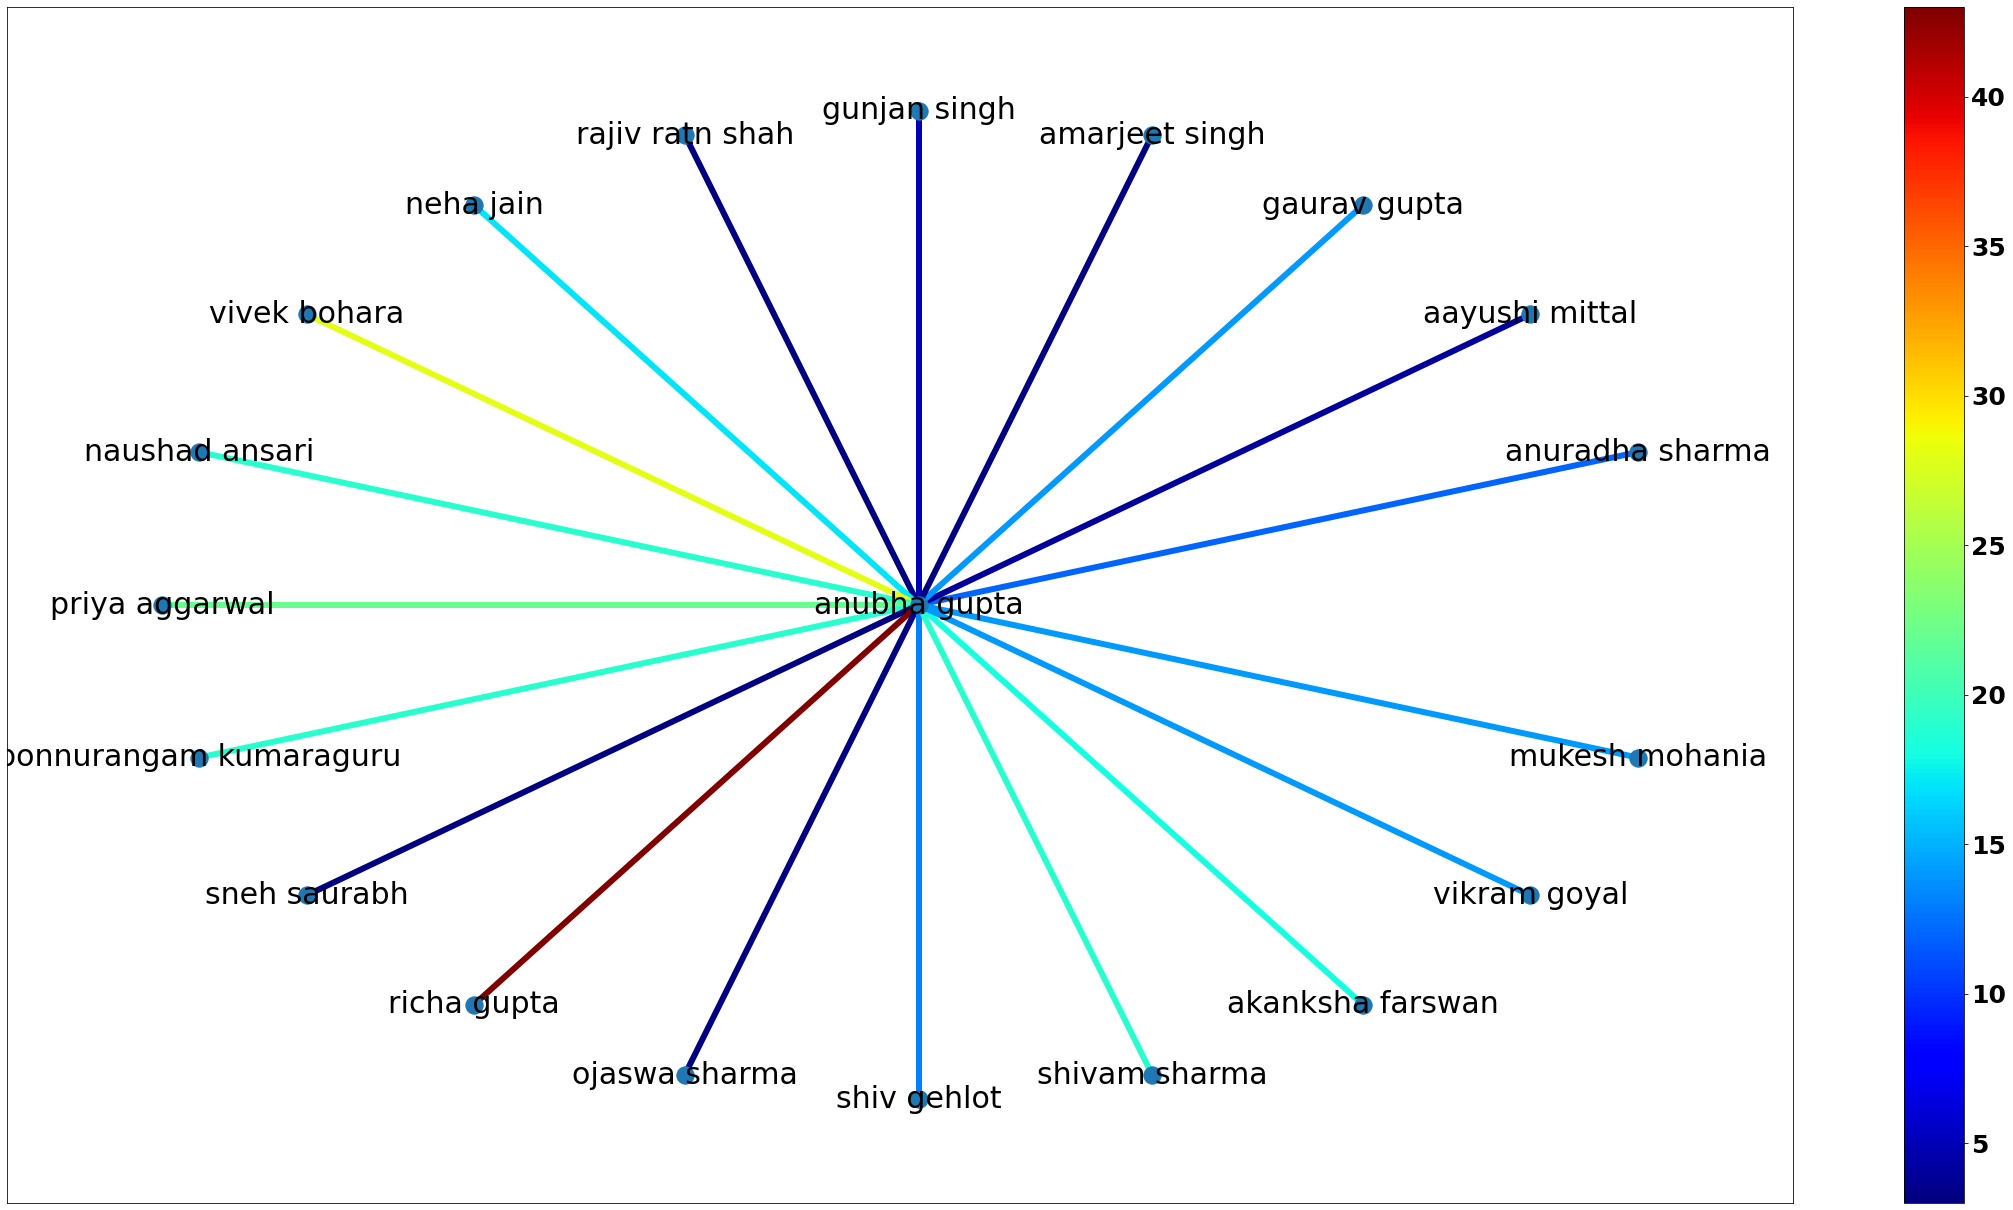

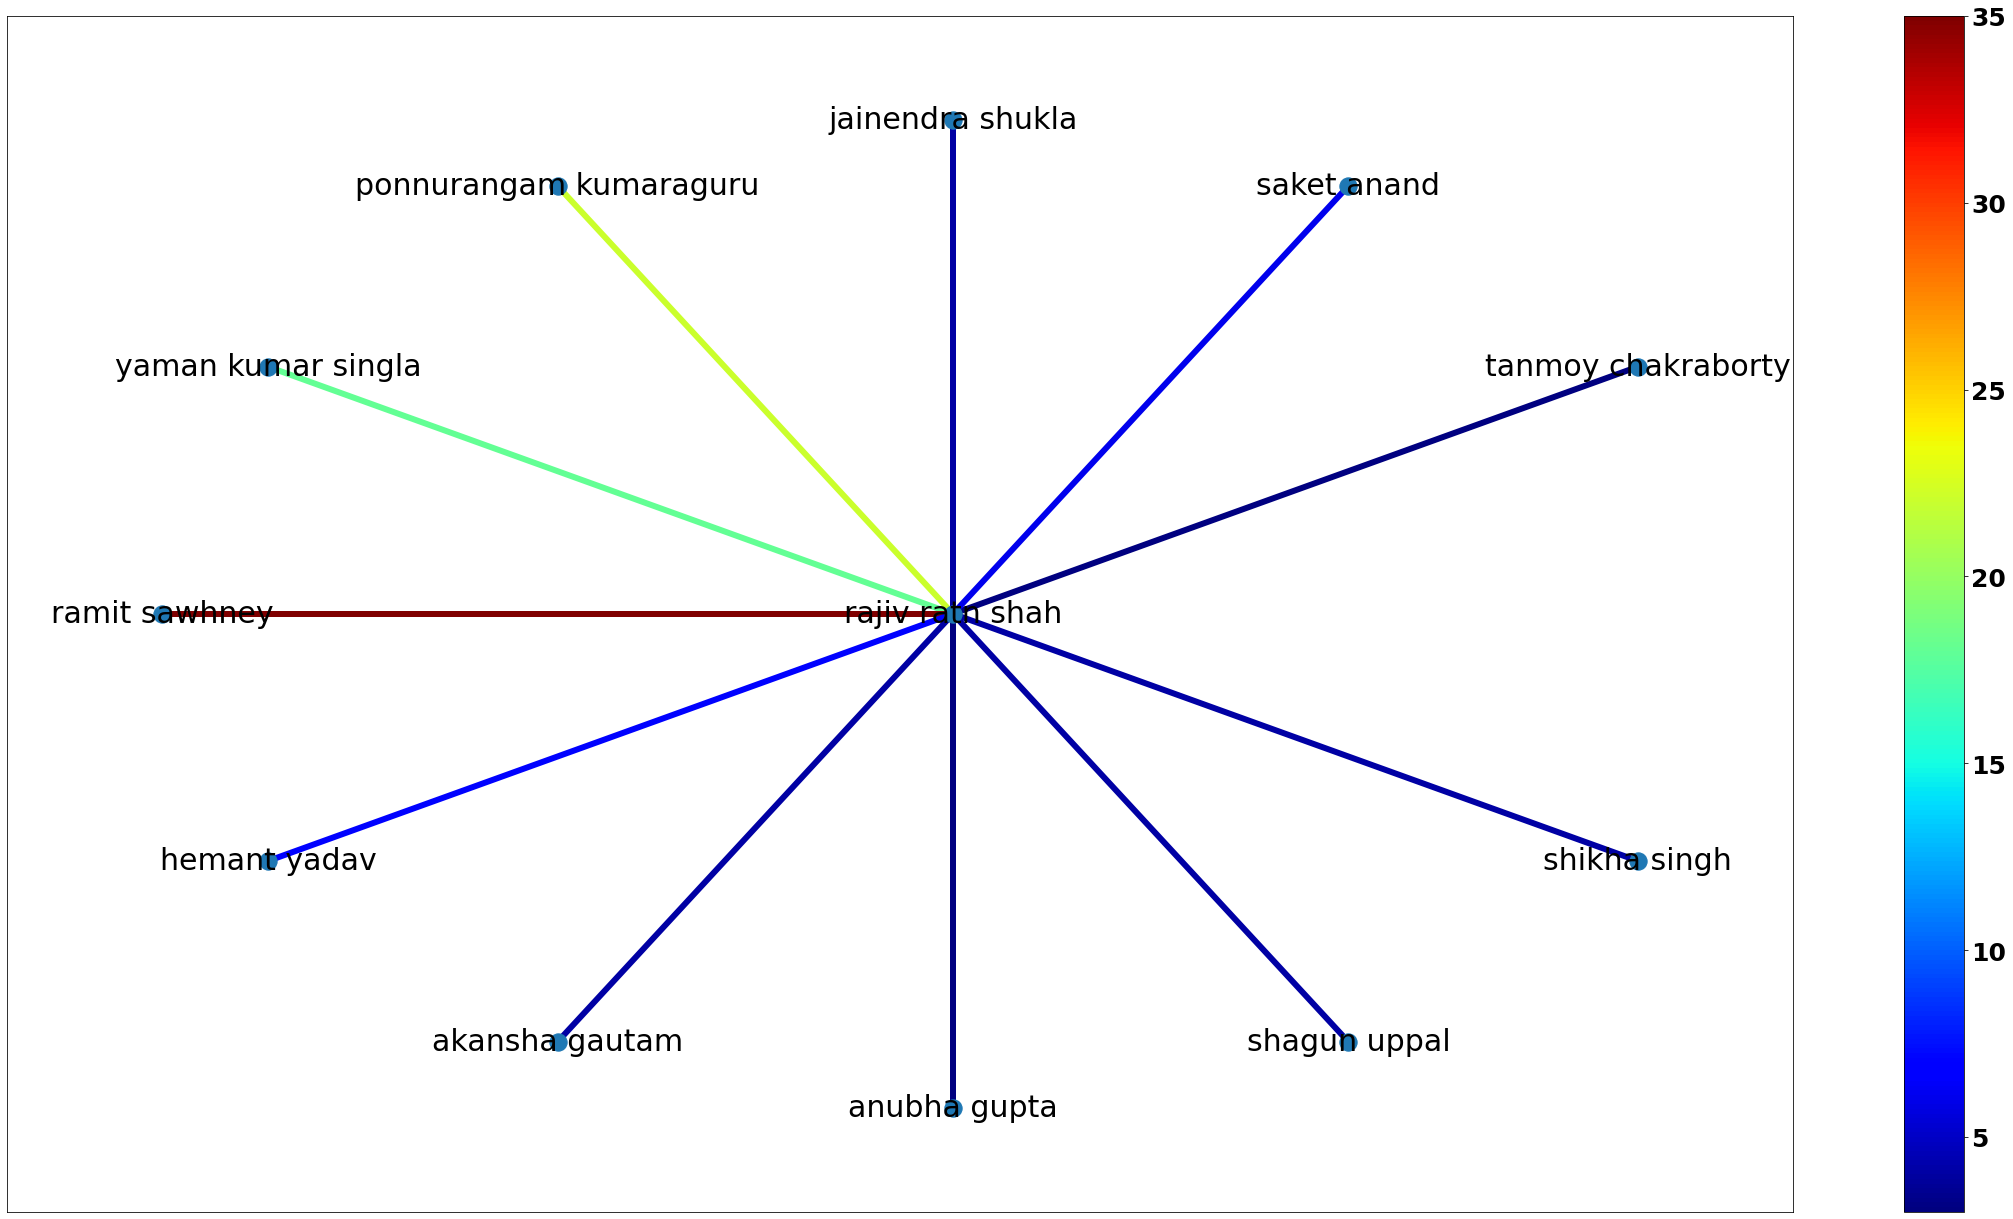

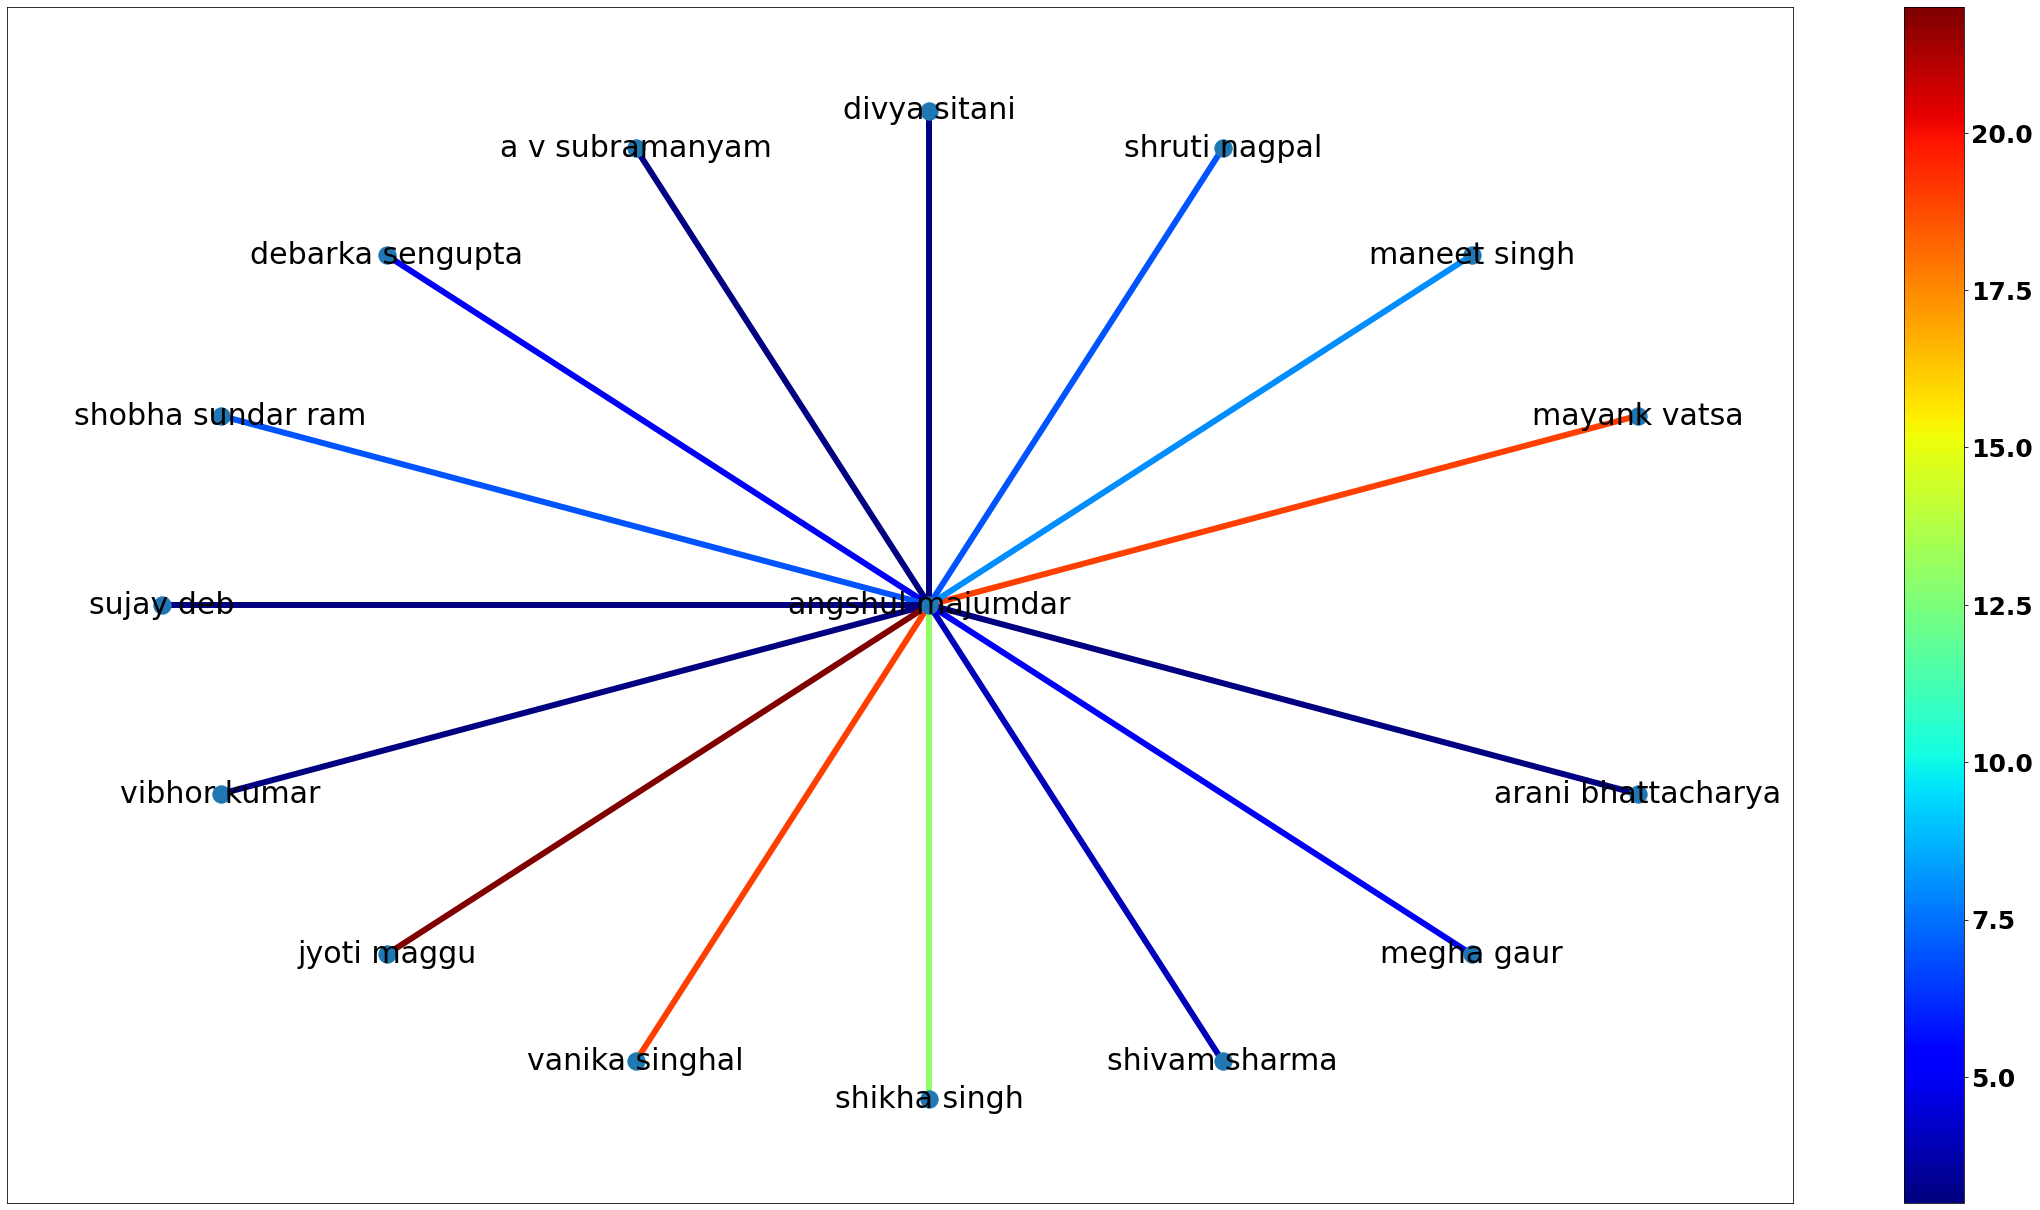

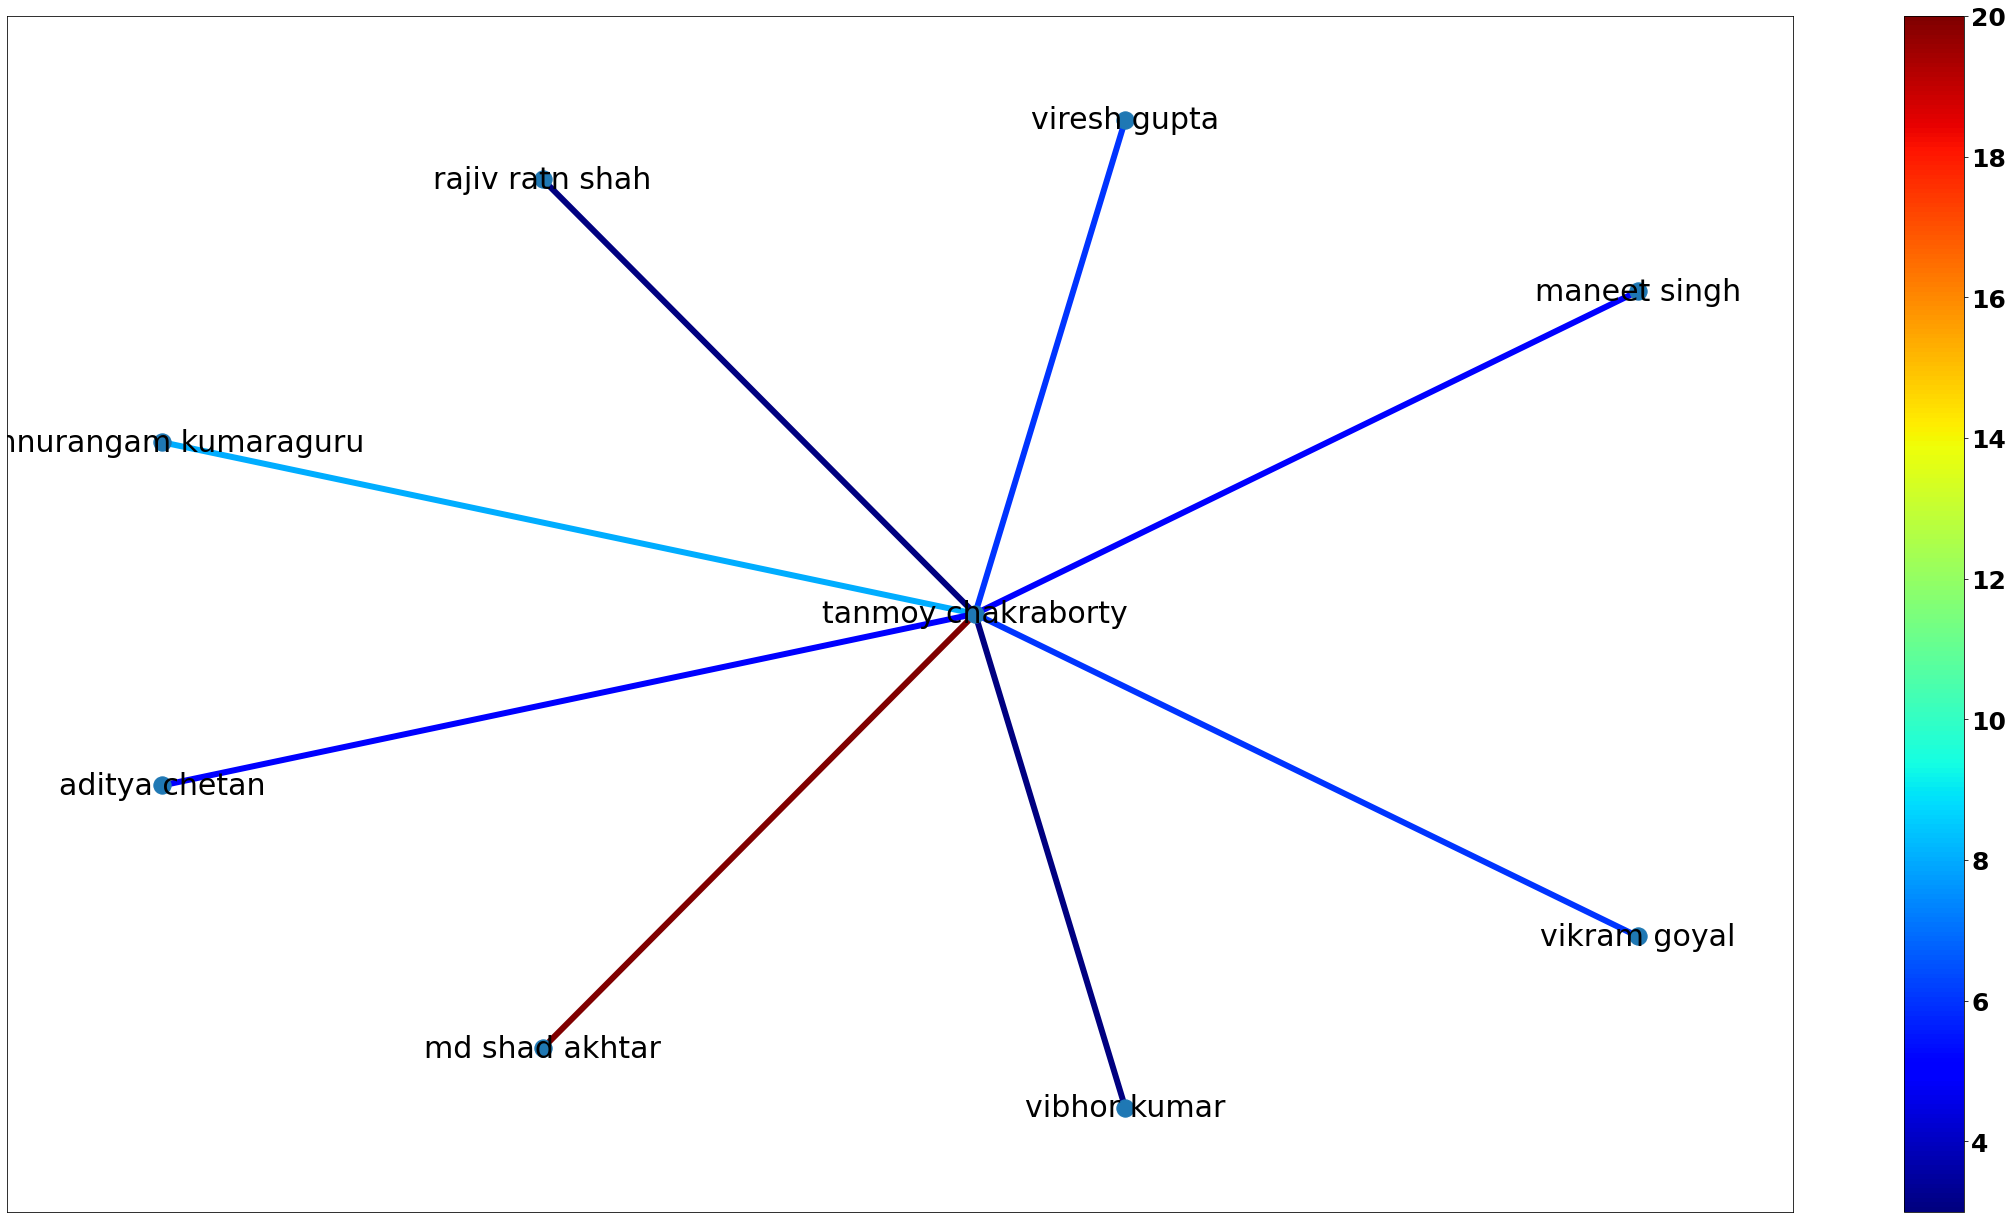

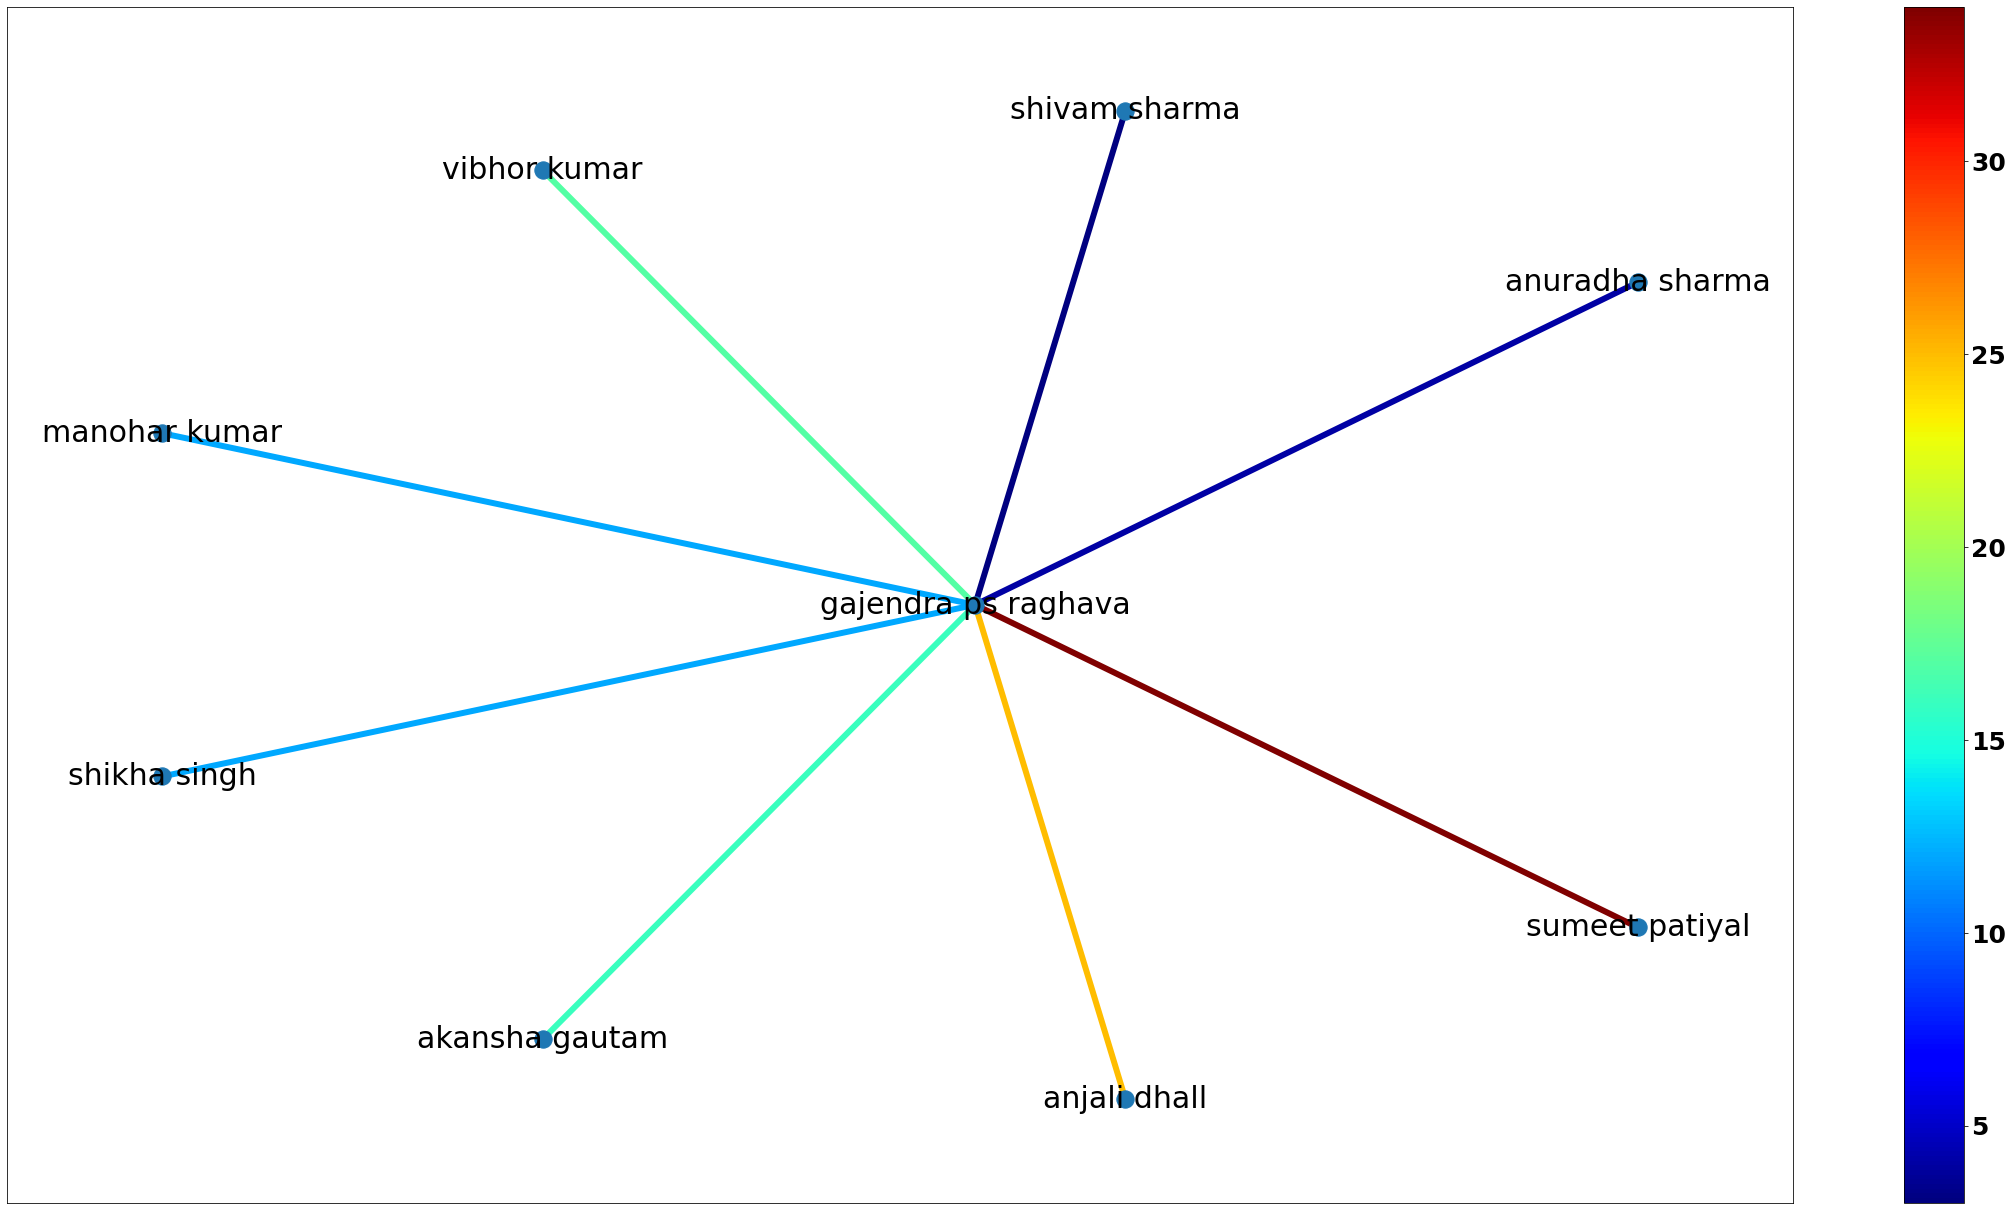

In [201]:
for author in authors:
    draw_neighbourhood_author(author)